In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

ds_name = 'resp+TB'
resp_folder = f'/mnt/data2/chaoyue/data/cleaned_resp_data_20221130'
for dirname, _, filenames in os.walk(resp_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/cleaned_resp_data_20221130/cleaned_edge.csv
/mnt/data2/chaoyue/data/cleaned_resp_data_20221130/chopped_resp_edge_20221130.csv
/mnt/data2/chaoyue/data/cleaned_resp_data_20221130/cleaned_node.csv


In [2]:
tb_folder = f'/mnt/data2/chaoyue/data/cleaned_TB_data_20230310'
for dirname, _, filenames in os.walk(tb_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/cleaned_TB_data_20230310/cleaned_edge.csv
/mnt/data2/chaoyue/data/cleaned_TB_data_20230310/cleaned_node.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
%matplotlib inline

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
#Import the files
TB_node_df = pd.read_csv(f'{tb_folder}/cleaned_node.csv')
TB_edge_df = pd.read_csv(f'{tb_folder}/cleaned_edge.csv')
resp_node_df = pd.read_csv(f'{resp_folder}/cleaned_node.csv')
resp_edge_df = pd.read_csv(f'{resp_folder}/cleaned_edge.csv')

In [5]:
TB_node_df['sim'] = TB_node_df['sim']+10000
TB_edge_df['sim'] = TB_edge_df['sim']+10000

In [6]:
len(TB_node_df['sim'].unique())

7029

In [7]:
min(TB_node_df['sim'].unique())

10001.0

In [8]:
max(TB_node_df['sim'].unique())

20000.0

In [9]:
min(resp_node_df['sim'].unique())

1

In [10]:
max(resp_node_df['sim'].unique())

9998

In [11]:
node_df = pd.concat([resp_node_df,TB_node_df],ignore_index=True)

In [12]:
edge_df = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)

In [13]:
node_df

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state
0,1000.0,Background,A,static,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-12,1,NaN
1,1000.0,Background,A,static,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-23,2,NaN
2,1000.0,Background,A,static,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-02-09,4,NaN
3,1000.0,Background,A,static,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,844,NaN
4,1000.0,Background,A,static,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55037088,10009.0,Background,C,static,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-06-03,615,1.0
55037089,10009.0,Background,C,static,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-25,3181,1.0
55037090,10009.0,Background,C,static,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-16,3119,1.0
55037091,10009.0,Background,C,static,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-20,302,1.0


In [14]:
print('Shape of node data is', node_df.shape)
print ('Shape of edge data is', edge_df.shape)

Shape of node data is (55037093, 21)
Shape of edge data is (55021490, 5)


In [24]:
impute_node = np.where(resp_node_df['cluster_id']=='Background')
resp_node_df = resp_node_df.reset_index(drop=True)
resp_node_df.loc[(impute_node[0]),'dynamic']='bg'
resp_s = resp_node_df[resp_node_df['dynamic']=='static']
resp_s

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node
3600,1000,c3,E,static,0.0,0.622179,85,19,2.250485,19.016364,180,3.049499,1.419803,1.000000,12.778231,concave_convex,0.297297,-2.5,2020-04-09,3497
3601,1000,c3,E,static,0.0,0.622179,85,19,2.250485,19.016364,180,3.049499,1.419803,1.000000,12.778231,concave_convex,0.297297,-2.5,2020-04-03,3475
3602,1000,c3,E,static,0.0,0.622179,85,19,2.250485,19.016364,180,3.049499,1.419803,1.000000,12.778231,concave_convex,0.297297,-2.5,2020-04-17,1866
3603,1000,c3,E,static,0.0,0.622179,85,19,2.250485,19.016364,180,3.049499,1.419803,1.000000,12.778231,concave_convex,0.297297,-2.5,2020-04-17,1379
3604,1000,c3,E,static,0.0,0.622179,85,19,2.250485,19.016364,180,3.049499,1.419803,1.000000,12.778231,concave_convex,0.297297,-2.5,2020-04-16,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33713770,9,c4,E,static,0.0,0.567451,46,20,4.087961,20.017373,183,-0.438632,2.200085,0.888889,10.195707,concave,0.346154,1.0,2020-04-11,800
33713771,9,c4,E,static,0.0,0.567451,46,20,4.087961,20.017373,183,-0.438632,2.200085,0.888889,10.195707,concave,0.346154,1.0,2020-04-11,1385
33713772,9,c4,E,static,0.0,0.567451,46,20,4.087961,20.017373,183,-0.438632,2.200085,0.888889,10.195707,concave,0.346154,1.0,2020-04-08,2652
33713773,9,c4,E,static,0.0,0.567451,46,20,4.087961,20.017373,183,-0.438632,2.200085,0.888889,10.195707,concave,0.346154,1.0,2020-04-02,2646


In [32]:
static_clu = 0
resp_s = resp_node_df[resp_node_df['dynamic']=='growth']
for tree in resp_s['sim'].unique():
    onetree = resp_s[resp_s['sim']==tree]
    static_clu += len(onetree['cluster_id'].unique())
len(resp_s)

1204540

In [33]:
static_clu

8527

In [38]:
impute_node = np.where(TB_node_df['cluster_id']=='Background')
TB_node_df = TB_node_df.reset_index(drop=True)
TB_node_df.loc[(impute_node[0]),'dynamic']='bg'
TB_s = TB_node_df[TB_node_df['dynamic']=='static']
TB_s

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_fraction_state,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node
3027,20000.0,c1,B,static,0.0,0.311042,92.0,1.0,101.0,-18.346357,101.005734,458.0,-27.906888,4.923155,0.0,117.746033,concave,0.171429,2.0,2020-07-05,875
3028,20000.0,c1,B,static,0.0,0.311042,92.0,1.0,101.0,-18.346357,101.005734,458.0,-27.906888,4.923155,0.0,117.746033,concave,0.171429,2.0,2020-05-29,3202
3029,20000.0,c1,B,static,0.0,0.311042,92.0,1.0,101.0,-18.346357,101.005734,458.0,-27.906888,4.923155,0.0,117.746033,concave,0.171429,2.0,2020-07-13,1494
3030,20000.0,c1,B,static,0.0,0.311042,92.0,1.0,101.0,-18.346357,101.005734,458.0,-27.906888,4.923155,0.0,117.746033,concave,0.171429,2.0,2020-06-23,3208
3031,20000.0,c1,B,static,0.0,0.311042,92.0,1.0,101.0,-18.346357,101.005734,458.0,-27.906888,4.923155,0.0,117.746033,concave,0.171429,2.0,2020-07-03,916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21322817,10009.0,c1,B,static,0.0,0.579720,92.0,1.0,83.0,-76.914429,83.007360,793.0,-13.837360,12126.725061,0.0,100.023861,concave_convex,0.264151,1.0,2020-05-18,2674
21322818,10009.0,c1,B,static,0.0,0.579720,92.0,1.0,83.0,-76.914429,83.007360,793.0,-13.837360,12126.725061,0.0,100.023861,concave_convex,0.264151,1.0,2020-05-25,2673
21322819,10009.0,c1,B,static,0.0,0.579720,92.0,1.0,83.0,-76.914429,83.007360,793.0,-13.837360,12126.725061,0.0,100.023861,concave_convex,0.264151,1.0,2020-05-26,388
21322820,10009.0,c1,B,static,0.0,0.579720,92.0,1.0,83.0,-76.914429,83.007360,793.0,-13.837360,12126.725061,0.0,100.023861,concave_convex,0.264151,1.0,2020-06-04,609


In [43]:
static_clu = 0
TB_s = TB_node_df[TB_node_df['dynamic']=='static']
for tree in TB_s['sim'].unique():
    onetree = TB_s[TB_s['sim']==tree]
    static_clu += len(onetree['cluster_id'].unique())
static_clu

6643

In [44]:
len(TB_s)

448657

### Count number of trees

In [17]:
node_tree_ids = node_df['sim'].unique()
edge_tree_ids = edge_df['sim'].unique()
assert len(node_tree_ids) == len(edge_tree_ids), f'Node: {len(node_tree_ids)}, {len(edge_tree_ids)}'

num_trees = len(node_tree_ids)
tree_ids = node_tree_ids
print(f'Number of trees: {num_trees}')

Number of trees: 15603


In [18]:
#information about the node data set
node_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55037093 entries, 0 to 55037092
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   sim                   float64
 1   cluster_id            object 
 2   state                 object 
 3   dynamic               object 
 4   dynamic_rparam        float64
 5   v_sampling_fraction   float64
 6   v_cluster_size        float64
 7   v_timespan            float64
 8   gamma                 float64
 9   oster                 float64
 10  PD                    float64
 11  R0                    float64
 12  abs_growth_rate       float64
 13  fraction_time_growth  float64
 14  r_max                 float64
 15  ltt_shape             object 
 16  cherries              float64
 17  BLD                   float64
 18  date                  object 
 19  node                  int64  
 20  v_fraction_state      float64
dtypes: float64(15), int64(1), object(5)
memory usage: 8.6+ GB


In [19]:
node_df.describe()

,sim,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,node,v_fraction_state
count,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,5.503709e+07,2.132332e+07
mean,8.737739e+03,5.593856e-03,2.067246e-01,1.458075e+03,1.168043e+02,inf,1.168084e+02,2.322071e+04,2.737647e-01,3.811778e+02,4.891143e-01,5.859464e+03,3.037417e-01,1.291086e+00,1.835811e+03,9.999981e-01
std,5.745675e+03,6.674699e-02,1.689310e-01,5.073483e+02,5.694020e+01,NaN,5.693724e+01,9.727758e+03,3.530135e+00,1.469061e+05,3.001271e-01,5.714609e+03,2.599996e-02,1.359589e+00,1.098322e+03,1.831121e-04
min,1.000000e+00,0.000000e+00,5.000154e-02,5.000000e+00,3.000000e+00,-3.028455e+05,3.106481e+00,1.500000e+01,-7.696299e+01,1.338253e-01,0.000000e+00,-6.619775e+00,7.692308e-02,-3.100000e+01,1.000000e+00,9.500000e-01
25%,3.798000e+03,0.000000e+00,1.541236e-01,1.572000e+03,8.300000e+01,-9.058483e+01,8.300381e+01,2.390800e+04,-6.530827e-01,9.526804e+01,2.278481e-01,3.636944e+03,2.803450e-01,1.000000e+00,8.890000e+02,1.000000e+00
50%,7.918000e+03,0.000000e+00,1.560942e-01,1.615000e+03,9.500000e+01,-1.632016e+01,9.500316e+01,2.697500e+04,9.309223e-01,1.360821e+02,4.831461e-01,5.580065e+03,3.152174e-01,1.000000e+00,1.802000e+03,1.000000e+00
75%,1.351600e+04,0.000000e+00,1.578555e-01,1.672000e+03,1.710000e+02,-1.152105e+01,1.710018e+02,2.887900e+04,2.214619e+00,1.789982e+02,7.500000e-01,8.122738e+03,3.226558e-01,2.000000e+00,2.742000e+03,1.000000e+00
max,2.000000e+04,5.146811e+00,9.999931e-01,3.988000e+03,2.370000e+02,inf,2.370015e+02,3.306700e+04,8.090652e+00,1.436932e+08,1.000000e+00,3.132914e+06,4.761905e-01,1.500000e+01,4.994000e+03,1.000000e+00


In [20]:
# change the dynamic of background nodes to bg
impute_node = np.where(node_df['cluster_id']=='Background')
node_df = node_df.reset_index(drop=True)
node_df.loc[(impute_node[0]),'dynamic']='bg'
node_df

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state
0,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-12,1,NaN
1,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-23,2,NaN
2,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-02-09,4,NaN
3,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,844,NaN
4,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55037088,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-06-03,615,1.0
55037089,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-25,3181,1.0
55037090,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-16,3119,1.0
55037091,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-20,302,1.0


#### Categorical label
    * Convert the dynamic column to the int value

In [22]:
# Use to record all the feature transformations
feat_dict = dict()

In [23]:
label_map = {'static':0,'decay':1,'growth':2,'bg':3}

In [24]:
node_df["dynamic_cat"] = node_df["dynamic"].map(label_map)
node_df["dynamic"] = node_df["dynamic"].astype('category')

In [25]:
node_df

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat
0,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-12,1,NaN,3
1,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-23,2,NaN,3
2,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-02-09,4,NaN,3
3,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,844,NaN,3
4,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,1600,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55037088,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-06-03,615,1.0,3
55037089,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-25,3181,1.0,3
55037090,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-16,3119,1.0,3
55037091,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-20,302,1.0,3


In [26]:
node_df['dynamic_cat'].unique()

array([3, 1, 2, 0])

In [27]:
node_df = node_df.reset_index(drop=True)
feat_dict['dynamic'] = {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}
print(feat_dict)

{'dynamic': {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}}


In [29]:
from collections import Counter
Counter(node_df['dynamic_cat'])

Counter({3: 48083516, 1: 640538, 2: 1694039, 0: 4619000})

In [24]:
prep_dict = {'dynamic': feat_dict["dynamic"]}

### Split the nodes into background and non-background

In [30]:
background_df = node_df[node_df['cluster_id']=='Background']
background_df 

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat
0,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-12,1,NaN,3
1,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-23,2,NaN,3
2,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-02-09,4,NaN,3
3,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,844,NaN,3
4,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,1600,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55037088,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-06-03,615,1.0,3
55037089,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-25,3181,1.0,3
55037090,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-16,3119,1.0,3
55037091,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-20,302,1.0,3


In [31]:
node_df['dynamic_cat'].unique()

array([3, 1, 2, 0])

In [32]:
55037093-48083516

6953577

In [33]:
node_df = node_df[node_df['cluster_id']!='Background']
node_df.head()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat
3497,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,-0.975746,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-12,2731,NaN,1
3498,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,-0.975746,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-29,74,NaN,1
3499,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,-0.975746,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-21,2737,NaN,1
3500,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,-0.975746,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-19,2734,NaN,1
3501,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,-0.975746,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-11,2730,NaN,1


### Remove trees with all background nodes

In [34]:
set(background_df['sim'].unique())-set(node_df['sim'].unique())

set()

In [35]:
set(node_df['sim'].unique())-set(background_df['sim'].unique())

set()

### Preprocessing-1: Gamma discretization
    * Quantile-based discretization function

In [36]:
gamma_cats, gamma_bins = pd.qcut(node_df['gamma'], 4, retbins=True, duplicates='drop')
gamma_cat_dict = {cat: i for i, cat in enumerate(gamma_cats.unique())}
print(gamma_bins)
print(gamma_cat_dict)

[-7.14782788e+04 -4.18408234e+00 -1.15355284e+00  9.15811626e-01
             inf]
{Interval(0.916, inf, closed='right'): 0, Interval(-4.184, -1.154, closed='right'): 1, Interval(-1.154, 0.916, closed='right'): 2, Interval(-71478.28, -4.184, closed='right'): 3}


In [37]:
prep_dict['gamma_bins'] = gamma_bins
prep_dict['gamma_cat_dict'] = gamma_cat_dict

NameError: name 'prep_dict' is not defined

In [ ]:
node_df['gamma_bin'] = gamma_cats
node_df['gamma_cat'] = node_df['gamma_bin'].replace(gamma_cat_dict, inplace=False)
print(f'Gamma cat: {node_df["gamma_cat"].unique()}')
node_df.head()

### Preprocessing-2: Encode the categorical feature and label
#### Categorical features
    * ltt_shape
    * gamma (processed before)

In [ ]:
node_df.head()

In [ ]:
#First of all we need to get the columns where the categorical features are present
# idea is to extract all the columns with type as object
node_df.dtypes.unique()

In [ ]:
for types in node_df.dtypes.unique():
    print(types,len(node_df.select_dtypes(types).columns))
    print(node_df.select_dtypes(types).columns)
    print('===')

In [ ]:
# Category the ltt_shape

# node_df = node_df.astype({'ltt_shape': 'category'}, copy=False)
node_df["ltt_shape"] = node_df["ltt_shape"].astype('category')
node_df["ltt_shape_cat"] = node_df["ltt_shape"].cat.codes
feat_dict['ltt_shape'] = dict(enumerate(node_df['ltt_shape'].cat.categories))
      
print(feat_dict)
node_df.head()

In [ ]:
# Record the cat_dict for gamma, reverse the previous the dict
for feat_name, cat_dict in zip(['gamma'], [gamma_cat_dict]):
    tmp_dict = {}
    for k, v in cat_dict.items():
        tmp_dict[v] = f'{k.left, k.right, k.closed}'
    feat_dict[feat_name] = tmp_dict
print(feat_dict)

In [ ]:
prep_dict['ltt_shape'] = feat_dict["ltt_shape"]
prep_dict['gamma'] = feat_dict["gamma"]

### Add state ID for post analysis

In [ ]:
group_dict = {}
i = 0
for group in ['Background','A','B','C','D','E','F','G']:
    group_dict[group] = i
    i += 1
group_dict

### Analysis-1 Correlation 
#### 1-1. The relationship between categorical features and label

In [ ]:
cat_feat_cols = ['ltt_shape_cat', 'gamma_cat']
cat_feat_cols

In [ ]:
from sklearn.feature_selection import chi2, mutual_info_classif

cat_feat_cols = ['ltt_shape_cat', 'gamma_cat']
chi2_sts, p_vals = chi2(node_df[cat_feat_cols], node_df['dynamic_cat'])
mis = mutual_info_classif(node_df[cat_feat_cols], node_df['dynamic_cat'])

for cat, chi2, p_val, mi in zip(cat_feat_cols, chi2_sts, p_vals, mis):
    degree_freedom = (len(node_df['dynamic_cat'].unique()) - 1) * (len(node_df[cat].unique())-1)
    print(f'{cat}: \n  df: {degree_freedom}, chi2: {chi2}, p_vals: {p_val}\n  MI: {mi}')

### Analysis-1
#### 1-2 The relationship between numerical features and label

In [ ]:
num_feat_cols = ["v_sampling_fraction", "v_cluster_size", "v_timespan", "oster", "PD",
                 "abs_growth_rate", "fraction_time_growth", "r_max","cherries","BLD","R0"]
aly_col = num_feat_cols + cat_feat_cols
#aly_col = num_feat_cols + cat_feat_cols+['dynamic_cat']
print(aly_col)

aly_df = node_df[aly_col]
print(aly_df.shape, f"num_feat: {len(num_feat_cols)}, cat_feat: {len(cat_feat_cols)}")

#### 1-2-1 Pearson R

In [ ]:
# Compute pairwise correlation of columns (pearson R: standard correlation coefficient)
aly_df.corr()

In [ ]:
Paper_feat = ['Sampling Fraction', 'Cluster Size', 'Time Span', 'Oster', 'PD', 'Abs Growth Rate','Fraction Time Growth',r'$R_{max}$',
              'Cherries','BLD',r'$R_0$', 'LTT Shape',r'$\gamma$']

In [ ]:
# Pearson Correlation Matrix

# Increase the size of the heatmap.
fig = plt.figure(figsize=(25, 18))
plt.rcParams.update({'font.size': 20})
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(aly_df.corr(), vmin=-1, vmax=1, annot=True,cmap='RdBu_r')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Pearson correlation heatmap', fontdict={'fontsize':30}, pad=14);
heatmap.set_xticklabels(Paper_feat,rotation=50)
heatmap.set_yticklabels(Paper_feat)
fig.savefig('../../DeepDynaTree/paper/resp+tb/pearson_resp_tb.svg',dpi=600,format='svg',bbox_inches='tight',pad_inches=0.0)

#### 1-2-2 Spearman correlation

In [ ]:
# Compute pairwise correlation of columns (Spearman rank correlation, non-linear)
aly_df.corr("spearman")

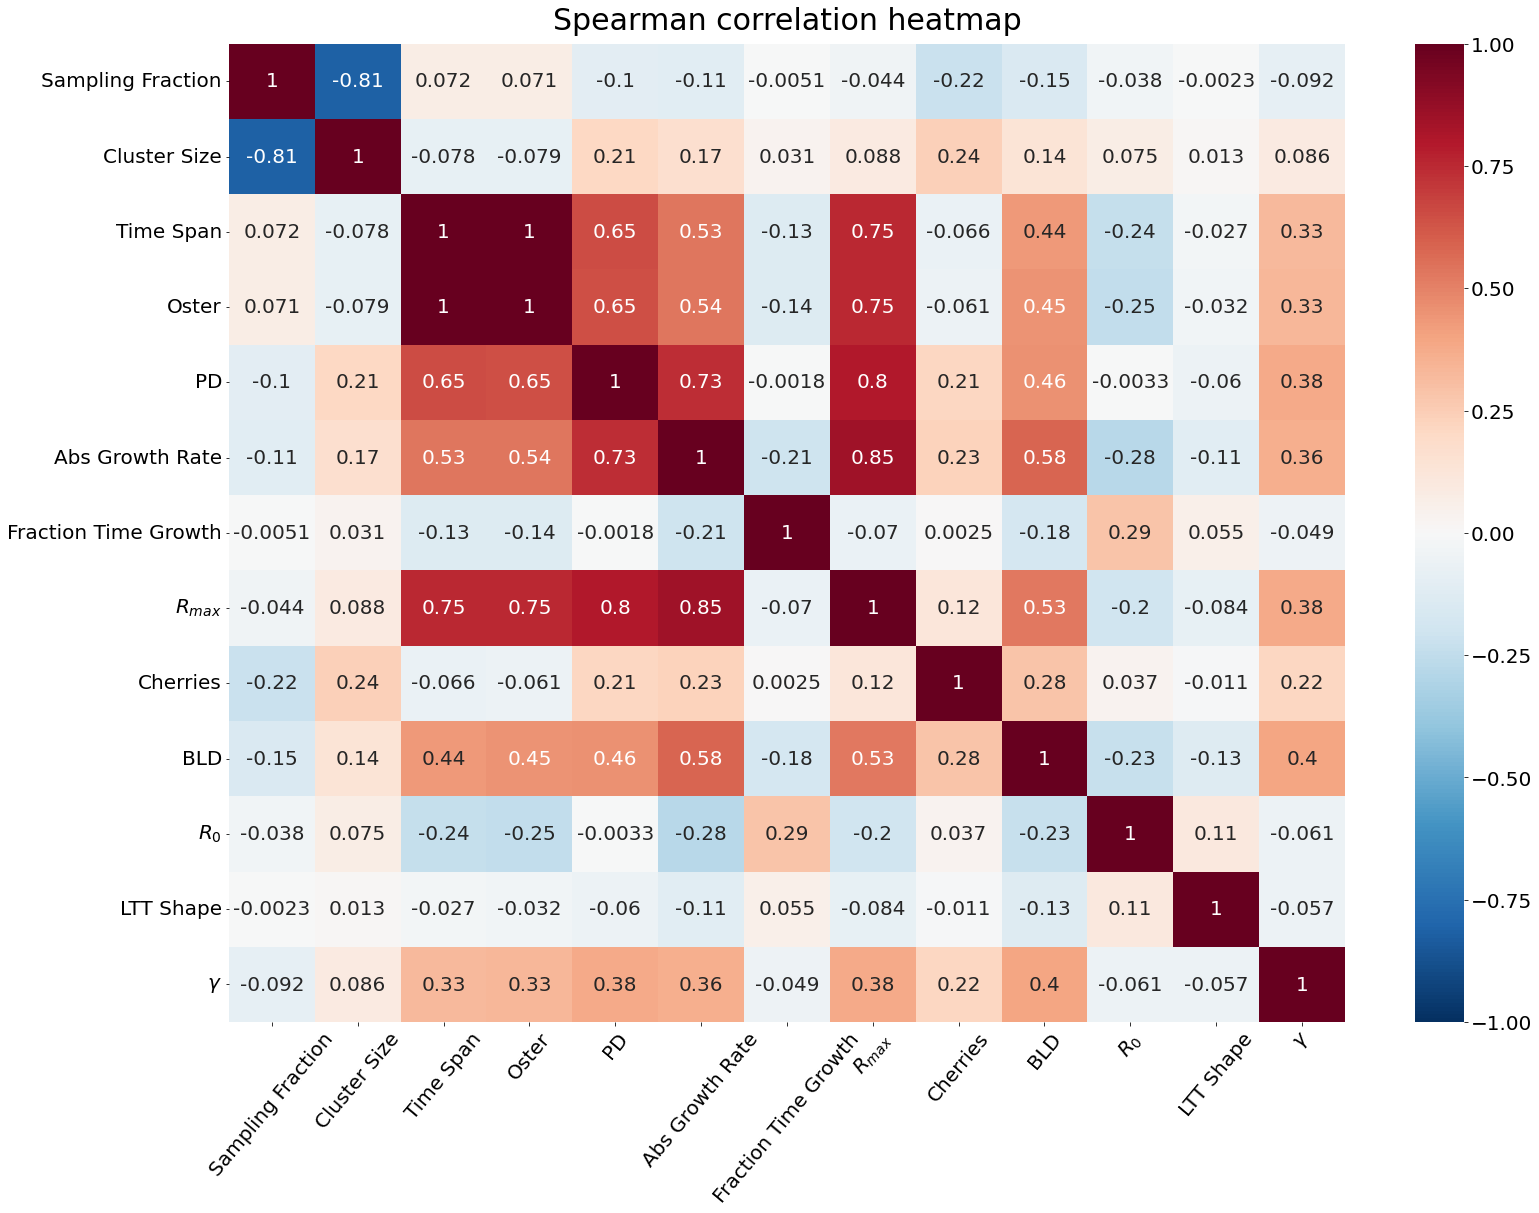

In [58]:
# Correlation Matrix

# Increase the size of the heatmap.
fig = plt.figure(figsize=(25, 18))
plt.rcParams.update({'font.size': 20})
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(aly_df.corr('spearman'), vmin=-1, vmax=1, annot=True,cmap='RdBu_r')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Spearman correlation heatmap', fontdict={'fontsize':30}, pad=14);
heatmap.set_xticklabels(Paper_feat,rotation=50)
heatmap.set_yticklabels(Paper_feat)
fig.savefig('../../DeepDynaTree/paper/resp+tb/spearman_resp_tb.svg',dpi=600,format='svg',bbox_inches='tight',pad_inches=0.0)

## Processing for Modeling

### Processing-1. One-hot encoding for the categorical feature
* ltt_shape_cat
* gamma_cat

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

cat_feat_cols = ['ltt_shape_cat','gamma_cat']
print(cat_feat_cols)
cat_onehot_feat = []
org_idx = node_df.index

for cat_feat in cat_feat_cols:
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    x = enc.fit_transform(node_df[cat_feat].values.reshape(-1, 1))
    n_dims = x.shape[-1]
    columns = [f'{cat_feat}_{i}' for i in range(n_dims)]
    cat_onehot_feat += columns
    cat_df = pd.DataFrame(x, index=org_idx, columns=columns)
    node_df = pd.concat([node_df, cat_df], axis=1)

In [ ]:
node_df

### Split the train/test sets (should put before imputing the missing values and calculating the correlation)

In [ ]:
random_seed = 123
date = '20230310'
np.random.seed(random_seed)
split_dir = f'/mnt/data2/chaoyue/data/{ds_name}_{date}/split_rs{random_seed}'
os.makedirs(split_dir, exist_ok=True)

In [62]:
split_dict = np.load('train_test_split_20230310.npy',allow_pickle=True)

In [ ]:
set(tree_ids)-set(split_dict.item()['train'])-set(split_dict.item()['test'])-set(split_dict.item()['valid'])

In [ ]:
len(split_dict.item()['train'])+len(split_dict.item()['test'])+len(split_dict.item()['valid'])

In [ ]:
len(tree_ids)

from sklearn.model_selection import  train_test_split
#split the data for training and testing
train_ids, test_ids = train_test_split(tree_ids, test_size=0.2)
print(f"Train: {len(train_ids)}, Test: {len(test_ids)}")
print(test_ids[:10])

In [ ]:
train_ids = np.concatenate([split_dict.item()['train'],split_dict.item()['valid']])
test_ids = split_dict.item()['test']

In [ ]:
len(train_ids)

In [ ]:
train_background_df = background_df[background_df['sim'].isin(train_ids)]
test_background_df = background_df[background_df['sim'].isin(test_ids)]
train_node_df = node_df[node_df['sim'].isin(train_ids)]
test_node_df = node_df[node_df['sim'].isin(test_ids)]

print(f'Train: {train_background_df.shape[0] + train_node_df.shape[0]}')
print(f'Test: {test_background_df.shape[0] + test_node_df.shape[0]}')
train_node_df.head()

### Processing-2: R0 correction
* Use the mean value of positive R0 in the **training** to replace all the negative R0 in the training and test
* Normalize the R0

In [ ]:
raw_r0 = np.reshape(train_node_df['R0'].values, (-1, 1))

# negtive replacement
r0_neg_idx = raw_r0 <= 0
r0_pos_idx = raw_r0 > 0
avg_r0 = np.average(raw_r0[r0_pos_idx])

raw_r0[r0_neg_idx] = avg_r0

In [ ]:
prep_dict['r0'] = avg_r0

In [71]:
train_node_df['R0'].describe()

count    5.556415e+06
mean     1.880629e+00
std      8.561926e-01
min      3.358511e-05
25%      1.618440e+00
50%      1.880629e+00
75%      1.939952e+00
max      8.005717e+00
Name: R0, dtype: float64

In [72]:
r0_norm_col = 'new_R0'
train_node_df[r0_norm_col]=raw_r0
train_node_df[r0_norm_col].describe()

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


count    5.556415e+06
mean     1.880629e+00
std      8.561926e-01
min      3.358511e-05
25%      1.618440e+00
50%      1.880629e+00
75%      1.939952e+00
max      8.005717e+00
Name: new_R0, dtype: float64

In [73]:
test_node_df['R0'].describe()

count    1.397162e+06
mean    -2.091143e+00
std      6.972321e+00
min     -6.332088e+01
25%     -2.477414e+00
50%      4.336662e-01
75%      1.963916e+00
max      8.027479e+00
Name: R0, dtype: float64

In [74]:
raw_r0 = np.reshape(test_node_df['R0'].values, (-1, 1))
r0_neg_idx = raw_r0 <= 0
raw_r0[r0_neg_idx] = avg_r0

In [75]:
r0_norm_col = 'new_R0'
test_node_df[r0_norm_col]=raw_r0
test_node_df[r0_norm_col].describe()

count    1.397162e+06
mean     1.884063e+00
std      8.577667e-01
min      1.524021e-07
25%      1.629933e+00
50%      1.880629e+00
75%      1.963916e+00
max      8.027479e+00
Name: new_R0, dtype: float64

In [76]:
num_feat_cols[-1] = 'new_R0'

### Processing-3. Normalize the input features:
* Use Standardization
* Use MinMax normalization to normalize data to [0, 1]

array([[<AxesSubplot:title={'center':'v_sampling_fraction'}>,
        <AxesSubplot:title={'center':'v_cluster_size'}>,
        <AxesSubplot:title={'center':'v_timespan'}>],
       [<AxesSubplot:title={'center':'oster'}>,
        <AxesSubplot:title={'center':'PD'}>,
        <AxesSubplot:title={'center':'abs_growth_rate'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth'}>,
        <AxesSubplot:title={'center':'r_max'}>,
        <AxesSubplot:title={'center':'cherries'}>],
       [<AxesSubplot:title={'center':'BLD'}>,
        <AxesSubplot:title={'center':'new_R0'}>, <AxesSubplot:>]],
      dtype=object)

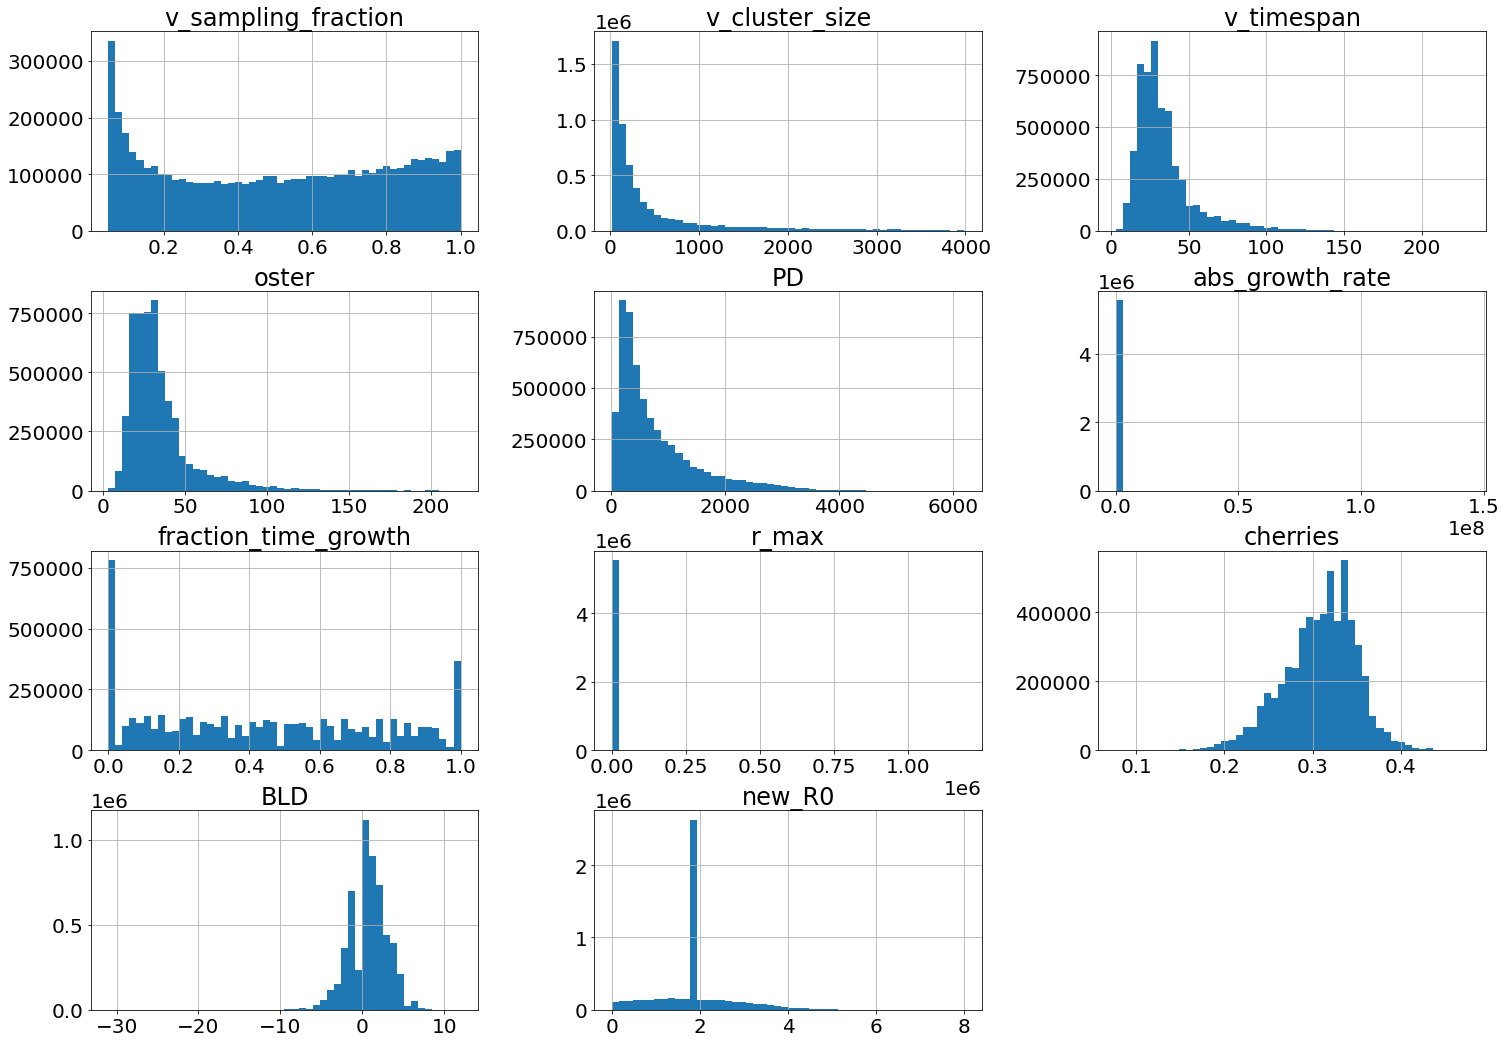

In [77]:
train_node_df[num_feat_cols].hist(bins=50,figsize=(25, 18))

In [78]:
num_feat_cols

['v_sampling_fraction',
 'v_cluster_size',
 'v_timespan',
 'oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0']

In [79]:
cat_feat_cols

['ltt_shape_cat', 'gamma_cat']

In [80]:
feat_cols = num_feat_cols+cat_feat_cols
feat_cols

['v_sampling_fraction',
 'v_cluster_size',
 'v_timespan',
 'oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0',
 'ltt_shape_cat',
 'gamma_cat']

In [81]:
# Standardization non-category features
std_scaler = preprocessing.StandardScaler().fit(train_node_df[num_feat_cols])
norm_num_feat_cols = [f'{col_name}-norm' for col_name in num_feat_cols]
norm_train_vals = std_scaler.transform(train_node_df[num_feat_cols])
norm_train_node_df = pd.DataFrame(norm_train_vals, columns=norm_num_feat_cols, index=train_node_df.index)
train_node_df = pd.concat([train_node_df, norm_train_node_df], axis=1)

In [82]:
norm_train_vals

array([[ 4.89552001e-01, -6.42552976e-01, -1.04512981e+00, ...,
        -5.58412068e-01, -7.14161518e-01,  5.18679132e-16],
       [ 4.89552001e-01, -6.42552976e-01, -1.04512981e+00, ...,
        -5.58412068e-01, -7.14161518e-01,  5.18679132e-16],
       [ 4.89552001e-01, -6.42552976e-01, -1.04512981e+00, ...,
        -5.58412068e-01, -7.14161518e-01,  5.18679132e-16],
       ...,
       [ 8.73514551e-01, -3.69716163e-01,  2.14655561e+00, ...,
        -8.59434596e-02,  5.65143583e-01,  1.33734315e+00],
       [ 8.73514551e-01, -3.69716163e-01,  2.14655561e+00, ...,
        -8.59434596e-02,  5.65143583e-01,  1.33734315e+00],
       [ 8.73514551e-01, -3.69716163e-01,  2.14655561e+00, ...,
        -8.59434596e-02,  5.65143583e-01,  1.33734315e+00]])

array([[<AxesSubplot:title={'center':'v_sampling_fraction-norm'}>,
        <AxesSubplot:title={'center':'v_cluster_size-norm'}>,
        <AxesSubplot:title={'center':'v_timespan-norm'}>],
       [<AxesSubplot:title={'center':'oster-norm'}>,
        <AxesSubplot:title={'center':'PD-norm'}>,
        <AxesSubplot:title={'center':'abs_growth_rate-norm'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth-norm'}>,
        <AxesSubplot:title={'center':'r_max-norm'}>,
        <AxesSubplot:title={'center':'cherries-norm'}>],
       [<AxesSubplot:title={'center':'BLD-norm'}>,
        <AxesSubplot:title={'center':'new_R0-norm'}>, <AxesSubplot:>]],
      dtype=object)

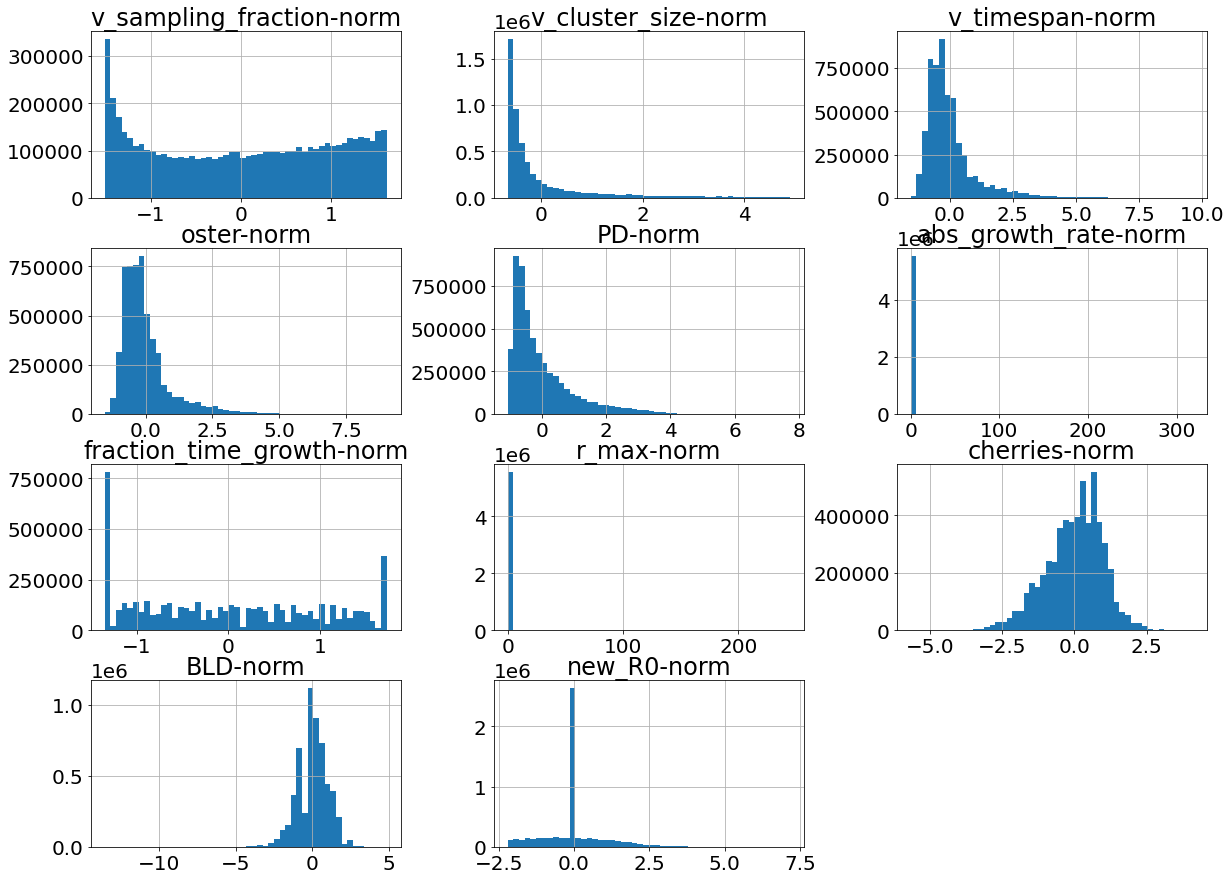

In [83]:
train_node_df[norm_num_feat_cols].hist(bins=50,figsize=(20,15))

In [84]:
print(std_scaler.mean_, std_scaler.scale_)

[5.09553331e-01 4.90240925e+02 3.42845029e+01 3.42964209e+01
 7.64572099e+02 1.97245406e+03 4.38075371e-01 2.02050822e+02
 3.08608291e-01 6.74725250e-01 1.88062867e+00] [3.03579200e-01 7.14712937e+02 2.03654156e+01 2.03564164e+01
 7.03525237e+02 4.51756636e+05 3.25232713e-01 4.86601387e+03
 4.09984065e-02 2.34502309e+00 8.56192552e-01]


In [85]:
norm_test_vals = std_scaler.transform(test_node_df[num_feat_cols])
norm_test_node_df = pd.DataFrame(norm_test_vals, columns=norm_num_feat_cols, index=test_node_df.index)
test_node_df = pd.concat([test_node_df, norm_test_node_df], axis=1)

array([[<AxesSubplot:title={'center':'v_sampling_fraction-norm'}>,
        <AxesSubplot:title={'center':'v_cluster_size-norm'}>,
        <AxesSubplot:title={'center':'v_timespan-norm'}>],
       [<AxesSubplot:title={'center':'oster-norm'}>,
        <AxesSubplot:title={'center':'PD-norm'}>,
        <AxesSubplot:title={'center':'abs_growth_rate-norm'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth-norm'}>,
        <AxesSubplot:title={'center':'r_max-norm'}>,
        <AxesSubplot:title={'center':'cherries-norm'}>],
       [<AxesSubplot:title={'center':'BLD-norm'}>,
        <AxesSubplot:title={'center':'new_R0-norm'}>, <AxesSubplot:>]],
      dtype=object)

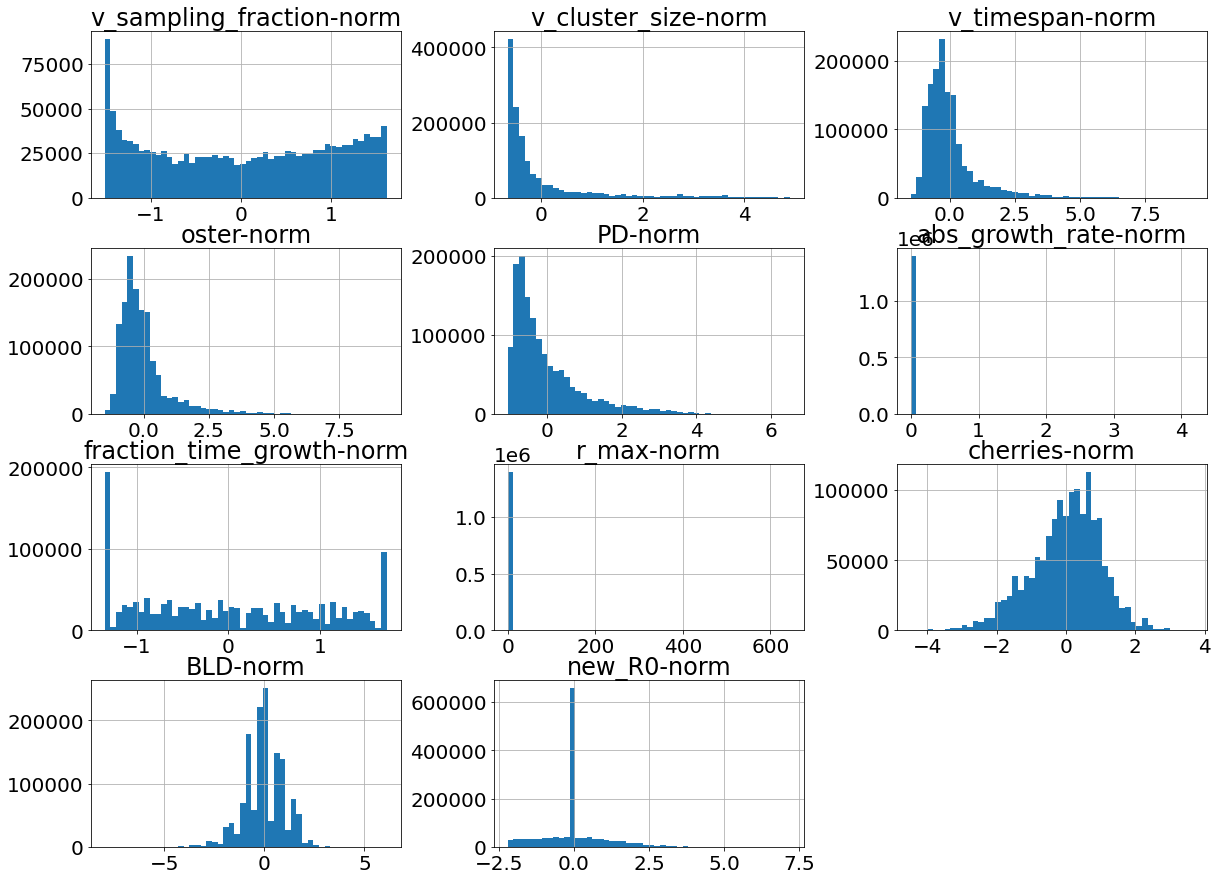

In [86]:
test_node_df[norm_num_feat_cols].hist(bins=50,figsize=(20,15))

In [87]:
train_node_df

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat,gamma_bin,gamma_cat,ltt_shape_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
3497,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.864320,13.022664,113.0,1.880629,4.042125,0.600000,12.054339,concave,0.285714,-1.0,2020-03-12,2731,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.045130,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3498,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.864320,13.022664,113.0,1.880629,4.042125,0.600000,12.054339,concave,0.285714,-1.0,2020-03-29,74,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.045130,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3499,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.864320,13.022664,113.0,1.880629,4.042125,0.600000,12.054339,concave,0.285714,-1.0,2020-03-21,2737,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.045130,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3500,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.864320,13.022664,113.0,1.880629,4.042125,0.600000,12.054339,concave,0.285714,-1.0,2020-03-19,2734,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.045130,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3501,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.864320,13.022664,113.0,1.880629,4.042125,0.600000,12.054339,concave,0.285714,-1.0,2020-03-11,2730,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.045130,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55036876,10009.0,c2,D,growth,0.210745,0.774734,226.0,78.0,-35.378205,78.004436,1225.0,3.025652,14.055985,0.552632,313.774081,concave,0.305085,2.0,2020-06-25,1875,1.0,2,"(-71478.28, -4.184]",3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.025652,0.873515,-0.369716,2.146556,2.147137,0.654458,-0.004335,0.352228,0.022960,-0.085943,0.565144,1.337343e+00
55036877,10009.0,c2,D,growth,0.210745,0.774734,226.0,78.0,-35.378205,78.004436,1225.0,3.025652,14.055985,0.552632,313.774081,concave,0.305085,2.0,2020-06-25,1876,1.0,2,"(-71478.28, -4.184]",3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.025652,0.873515,-0.369716,2.146556,2.147137,0.654458,-0.004335,0.352228,0.022960,-0.085943,0.565144,1.337343e+00
55036878,10009.0,c2,D,growth,0.210745,0.774734,226.0,78.0,-35.378205,78.004436,1225.0,3.025652,14.055985,0.552632,313.774081,concave,0.305085,2.0,2020-06-25,1877,1.0,2,"(-71478.28, -4.184]",3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.025652,0.873515,-0.369716,2.146556,2.147137,0.654458,-0.004335,0.352228,0.022960,-0.085943,0.565144,1.337343e+00
55036879,10009.0,c2,D,growth,0.210745,0.774734,226.0,78.0,-35.378205,78.004436,1225.0,3.025652,14.055985,0.552632,313.774081,concave,0.305085,2.0,2020-06-25,1878,1.0,2,"(-71478.28, -4.184]",3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.025652,0.873515,-0.369716,2.146556,2.147137,0.654458,-0.004335,0.352228,0.022960,-0.085943,0.565144,1.337343e+00


In [88]:
num_feat_cols

['v_sampling_fraction',
 'v_cluster_size',
 'v_timespan',
 'oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0']

In [89]:
prep_dict['feat'] = num_feat_cols
prep_dict['mean'] = std_scaler.mean_
prep_dict['std'] = std_scaler.scale_
prep_dict

{'dynamic': {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'},
 'gamma_bins': array([-7.14782788e+04, -4.18408234e+00, -1.15355284e+00,  9.15811626e-01,
                    inf]),
 'gamma_cat_dict': {Interval(0.916, inf, closed='right'): 0,
  Interval(-4.184, -1.154, closed='right'): 1,
  Interval(-1.154, 0.916, closed='right'): 2,
  Interval(-71478.28, -4.184, closed='right'): 3},
 'ltt_shape': {0: 'concave',
  1: 'concave_convex',
  2: 'convex',
  3: 'convex_concave'},
 'gamma': {0: "(0.916, inf, 'right')",
  1: "(-4.184, -1.154, 'right')",
  2: "(-1.154, 0.916, 'right')",
  3: "(-71478.28, -4.184, 'right')"},
 'r0': 1.8806286709062279,
 'feat': ['v_sampling_fraction',
  'v_cluster_size',
  'v_timespan',
  'oster',
  'PD',
  'abs_growth_rate',
  'fraction_time_growth',
  'r_max',
  'cherries',
  'BLD',
  'new_R0'],
 'mean': array([5.09553331e-01, 4.90240925e+02, 3.42845029e+01, 3.42964209e+01,
        7.64572099e+02, 1.97245406e+03, 4.38075371e-01, 2.02050822e+02,
        3.08608291e-0

In [88]:
np.save("prep-resp+TB_20230310.npy",prep_dict)

### Preprocessing-4 generate label weights

In [90]:
from collections import Counter
node_label = train_node_df['dynamic_cat'].values
label_counter = Counter(node_label)
n_samples = len(node_label)
n_classes = len(label_counter)

label_weights = [n_samples / (n_classes * label_counter[i]) for i in range(n_classes)]
label_weights

[0.5017934887494581, 3.612215736408558, 1.3692816859931418]

In [91]:
label_counter

Counter({1: 512743, 2: 1352635, 0: 3691037})

In [91]:
# move this part after train-test split
np.save("label_weights_resp+TB.npy",label_weights)

#### Plot for Paper Supplementary(not included in preprocessing) 

In [78]:
# remove samples with AbsGrowth Rate>100
train_node_df = train_node_df[train_node_df[feat_cols[5]]<100]
test_node_df = test_node_df[test_node_df[feat_cols[5]]<100]

In [ ]:
#i =5 and 7

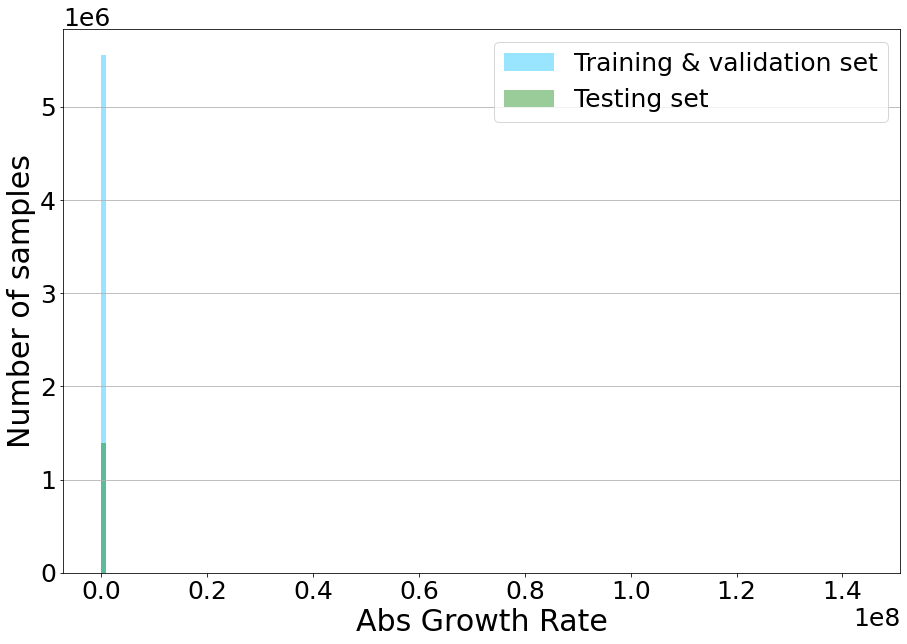

In [147]:
i = 5
feat = feat_cols[i]
#for feat in feat_cols:
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(train_node_df[feat],bins=150,hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
sns.distplot(test_node_df[feat],bins=2,hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
#ax1.set(ylim=(0,1700000))
ax1.axes.set_ylabel("Number of samples",fontsize=30)
ax1.axes.set_xlabel(f"{Paper_feat[i]}",fontsize=30)
#ax1.axes.set_xlabel(f"{Paper_feat[i]} category",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/resp+tb/feat_dist/{feat}.svg",bbox_inches='tight',pad_inches=0.0,dpi=600,format='svg')

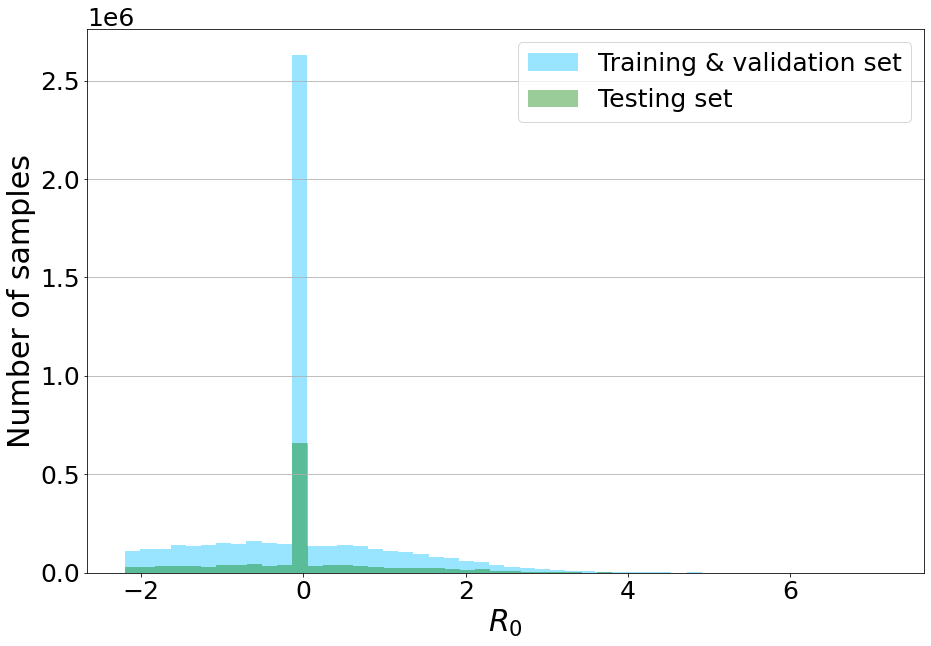

In [174]:
i = 10
feat = norm_num_feat_cols[i]
#for feat in feat_cols:
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(train_node_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
sns.distplot(test_node_df[feat],hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
#ax1.set(ylim=(0,1400000))
ax1.axes.set_ylabel("Number of samples",fontsize=30)
ax1.axes.set_xlabel(f"{Paper_feat[i]}",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/resp+tb/norm_feat_dist/{feat}.svg",bbox_inches='tight',pad_inches=0.0,dpi=600,format='svg')

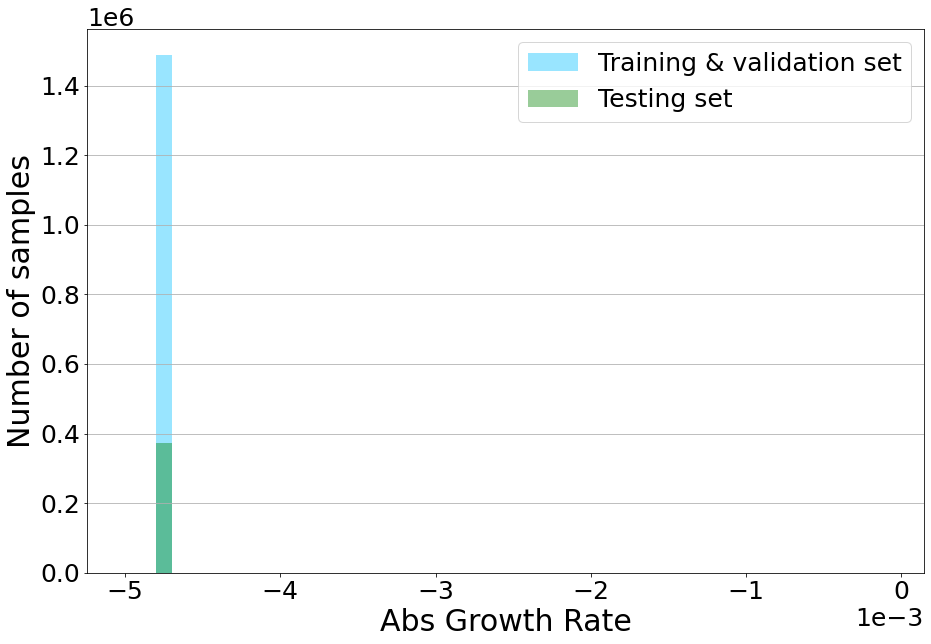

In [92]:
# special for AbsGrowthRate
i = 5
feat = norm_num_feat_cols[i]
#for feat in feat_cols:
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(train_node_df[feat],bins=np.arange(-0.005,0,0.0001),hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
sns.distplot(test_node_df[feat],bins=np.arange(-0.005,0,0.0001),hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
#ax1.set(ylim=(0,1800000))
ax1.axes.set_ylabel("Number of samples",fontsize=30)
ax1.axes.set_xlabel(f"{Paper_feat[i]}",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
#fig.savefig(f"../paper/norm_feat_dist/{feat}.svg",bbox_inches='tight',pad_inches=0.0,dpi=600,format='svg')

In [92]:
# Obtain the onehot features
import re
all_cols = node_df.columns.values

onehot_cols = []
for feat_name, pattern in zip(['ltt_shape_onehot', 'R0_onehot', 'gamma_onehot'], 
                              ['ltt_shape_cat_\d*', 'R0_cat_\d*', 'gamma_cat_\d']):
    for feat_col in all_cols:
        m = re.match(pattern, feat_col)
        if m:
            feat_dict.setdefault(feat_name, []).append(m.group(0))
            
print(feat_dict)

{'dynamic': {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}, 'ltt_shape': {0: 'concave', 1: 'concave_convex', 2: 'convex', 3: 'convex_concave'}, 'gamma': {0: "(0.916, inf, 'right')", 1: "(-4.184, -1.154, 'right')", 2: "(-1.154, 0.916, 'right')", 3: "(-71478.28, -4.184, 'right')"}, 'ltt_shape_onehot': ['ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2', 'ltt_shape_cat_3'], 'gamma_onehot': ['gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2', 'gamma_cat_3']}


In [93]:
print(train_node_df.shape)

(5556415, 45)


In [94]:
train_node_df.head()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat,gamma_bin,gamma_cat,ltt_shape_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
3497,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-12,2731,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3498,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-29,74,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3499,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-21,2737,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3500,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-19,2734,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3501,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-11,2730,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16


In [95]:
train_node_df.head()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat,gamma_bin,gamma_cat,ltt_shape_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
3497,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-12,2731,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3498,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-29,74,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3499,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-21,2737,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3500,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-19,2734,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3501,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-11,2730,NaN,1,"(0.916, inf]",0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16


### Merge the background and non-background nodes

In [96]:
# train_full_df = train_node_df.merge(train_background_df, how='inner', left_on=list(train_background_df.columns), right_on=list(train_background_df.columns), left_index=True, right_index=True)
#train_full_df = train_node_df
#print(f'Train: {train_full_df.shape}')

#test_full_df = test_node_df
#print(f'Test: {test_full_df.shape}')

train_full_df = pd.concat([train_node_df, train_background_df])
print(f'Train: {train_full_df.shape}')

test_full_df = pd.concat([test_node_df, test_background_df])
print(f'Test: {test_full_df.shape}')

Train: (43999943, 45)
Test: (11037150, 45)


In [97]:
del train_background_df
del test_background_df

In [98]:
del train_node_df
del test_node_df

#### Split validation set

In [99]:
train_ids = split_dict.item()['train']
valid_ids = split_dict.item()['valid']

train_ids, valid_ids = train_test_split(train_ids, test_size=0.25)
print(f"Train: {len(train_ids)}, Test: {len(valid_ids)}")
print(valid_ids[:10])

In [100]:
train_full_df = train_full_df.reset_index(drop=True)
train_node_df = train_full_df[train_full_df['sim'].isin(train_ids)]
valid_node_df = train_full_df[train_full_df['sim'].isin(valid_ids)]

print(f'Train node: {train_node_df.shape[0]}')
print(f'Valid node: {valid_node_df.shape[0]}')
train_node_df.head()

Train node: 33011595
Valid node: 10988348


,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat,gamma_bin,gamma_cat,ltt_shape_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
0,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-12,2731,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
1,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-29,74,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
2,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-21,2737,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-19,2734,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
4,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-11,2730,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16


In [101]:
# Save the train/valid/test to the disk
train_node_df.to_csv(f'{split_dir}/train.csv', index=False)
test_full_df.to_csv(f'{split_dir}/test.csv', index=False)
valid_node_df.to_csv(f'{split_dir}/valid.csv', index=False)

In [102]:
train_full_df.head()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat,gamma_bin,gamma_cat,ltt_shape_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
0,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-12,2731,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
1,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-29,74,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
2,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-21,2737,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
3,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-19,2734,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16
4,1000.0,c1,G,decay,0.298941,0.658171,31.0,13.0,2.86432,13.022664,113.0,1.880629,4.042125,0.6,12.054339,concave,0.285714,-1.0,2020-03-11,2730,NaN,1,"(0.916, inf]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.880629,0.489552,-0.642553,-1.04513,-1.045064,-0.926153,-0.004357,0.497873,-0.039046,-0.558412,-0.714162,5.186791e-16


In [103]:
train_full_df.tail()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state,dynamic_cat,gamma_bin,gamma_cat,ltt_shape_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
43999938,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.58186,10.560938,0.45,180.207596,concave_convex,0.257143,-9.0,2020-06-03,615,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43999939,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.58186,10.560938,0.45,180.207596,concave_convex,0.257143,-9.0,2020-05-25,3181,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43999940,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.58186,10.560938,0.45,180.207596,concave_convex,0.257143,-9.0,2020-05-16,3119,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43999941,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.58186,10.560938,0.45,180.207596,concave_convex,0.257143,-9.0,2020-05-20,302,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43999942,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.58186,10.560938,0.45,180.207596,concave_convex,0.257143,-9.0,2020-05-31,455,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finalize the feature information and save to the file

In [104]:
all_cols = test_full_df.columns
print(all_cols)

Index(['sim', 'cluster_id', 'state', 'dynamic', 'dynamic_rparam',
       'v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'gamma', 'oster',
       'PD', 'R0', 'abs_growth_rate', 'fraction_time_growth', 'r_max',
       'ltt_shape', 'cherries', 'BLD', 'date', 'node', 'v_fraction_state',
       'dynamic_cat', 'gamma_bin', 'gamma_cat', 'ltt_shape_cat',
       'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2',
       'ltt_shape_cat_3', 'gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2',
       'gamma_cat_3', 'new_R0', 'v_sampling_fraction-norm',
       'v_cluster_size-norm', 'v_timespan-norm', 'oster-norm', 'PD-norm',
       'abs_growth_rate-norm', 'fraction_time_growth-norm', 'r_max-norm',
       'cherries-norm', 'BLD-norm', 'new_R0-norm'],
      dtype='object')


In [105]:
onehot_cols = feat_dict['ltt_shape_onehot'] + feat_dict['gamma_onehot']

raw_cols = num_feat_cols + cat_feat_cols
norm_onehot_cols = norm_num_feat_cols + onehot_cols
print(f'Raw cols: {raw_cols}', len(raw_cols))
print(f'Norm with onehot cols: {norm_onehot_cols[3:]}', len(norm_onehot_cols[3:]))

Raw cols: ['v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'oster', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max', 'cherries', 'BLD', 'new_R0', 'ltt_shape_cat', 'gamma_cat'] 13
Norm with onehot cols: ['oster-norm', 'PD-norm', 'abs_growth_rate-norm', 'fraction_time_growth-norm', 'r_max-norm', 'cherries-norm', 'BLD-norm', 'new_R0-norm', 'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2', 'ltt_shape_cat_3', 'gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2', 'gamma_cat_3'] 16


In [106]:
feat_dict['raw_feats'] = raw_cols
feat_dict['norm_onehot_feats'] = norm_onehot_cols[3:]

In [107]:
import json 

with open('feat_dict-resp+TB.json', 'w') as outfile:
    json.dump(feat_dict, outfile, sort_keys=True, indent=4)

### Store a simplified data (remove all original features)

In [108]:
train_full_df.columns

Index(['sim', 'cluster_id', 'state', 'dynamic', 'dynamic_rparam',
       'v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'gamma', 'oster',
       'PD', 'R0', 'abs_growth_rate', 'fraction_time_growth', 'r_max',
       'ltt_shape', 'cherries', 'BLD', 'date', 'node', 'v_fraction_state',
       'dynamic_cat', 'gamma_bin', 'gamma_cat', 'ltt_shape_cat',
       'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2',
       'ltt_shape_cat_3', 'gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2',
       'gamma_cat_3', 'new_R0', 'v_sampling_fraction-norm',
       'v_cluster_size-norm', 'v_timespan-norm', 'oster-norm', 'PD-norm',
       'abs_growth_rate-norm', 'fraction_time_growth-norm', 'r_max-norm',
       'cherries-norm', 'BLD-norm', 'new_R0-norm'],
      dtype='object')

In [109]:
keep_feats = ['sim', 'cluster_id', 'state', 'dynamic', 'node', 'dynamic_cat',
       'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2',
       'ltt_shape_cat_3', 'gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2',
       'gamma_cat_3', 'oster-norm', 'PD-norm',
       'abs_growth_rate-norm', 'fraction_time_growth-norm', 'r_max-norm',
       'cherries-norm', 'BLD-norm', 'new_R0-norm']

In [110]:
train_node_df[keep_feats].to_csv(f'{split_dir}/train_s.csv', index=False)
test_full_df[keep_feats].to_csv(f'{split_dir}/test_s.csv', index=False)
valid_node_df[keep_feats].to_csv(f'{split_dir}/valid_s.csv', index=False)